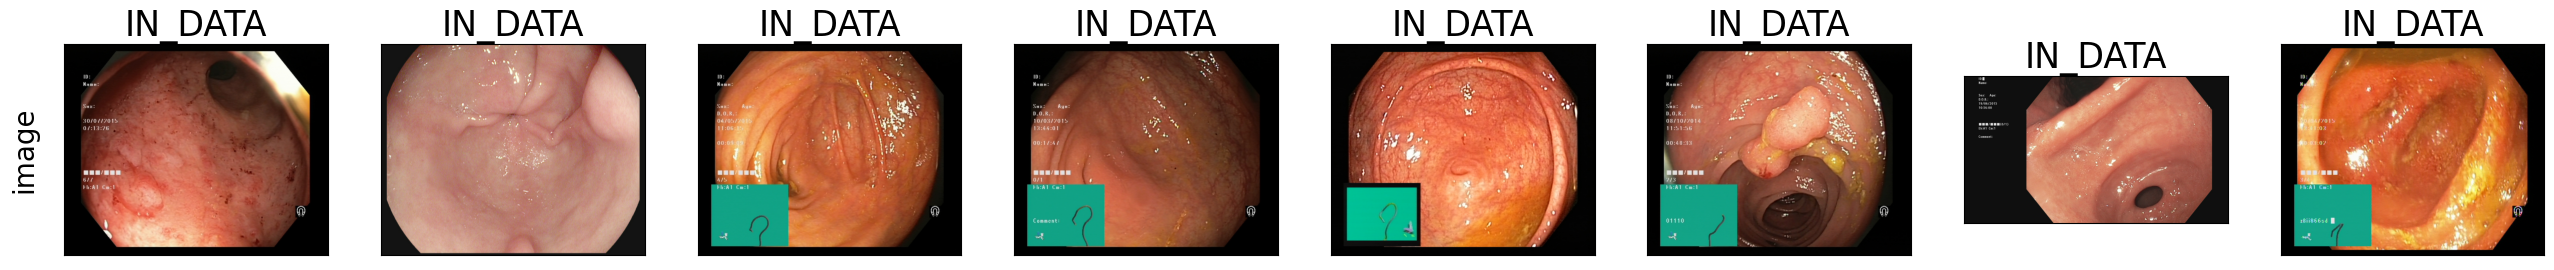

In [33]:
import os
from froodo import SampleDataset
from torch.utils.data import Dataset
import torch
from PIL import Image
from torchvision import transforms
from froodo import Sample


class KsavirDataset(Dataset,SampleDataset):
    def __init__(self, root_path: str) -> None:
        super().__init__()
        self.root_path = root_path
        #self.images = glob.glob(root_path + "/*/")
        self.images = []
        for folder in os.listdir(root_path):
            self.images += [folder + "/" + file for file in os.listdir(root_path +"/"+folder)]
        self.convert_to_tensor = transforms.PILToTensor()

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index) -> torch.Tensor:
        img = Image.open(self.root_path + "/" + self.images[index])
        image = self.convert_to_tensor(img)
        return Sample(image)



ksavir_dataset = KsavirDataset("G:\FrOoDo\Datasets\kvasir-dataset-v2")
assert len(ksavir_dataset)==8000

ksavir_dataset.sample()